<a href="https://colab.research.google.com/github/testGithub-web/brainstroke/blob/main/MajorProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [1]:
# The libraries used in processing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#The dataframe is read from csv file which are taken from kaggle
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [3]:
#First Five Instance of the file
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Find the number of NULL values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

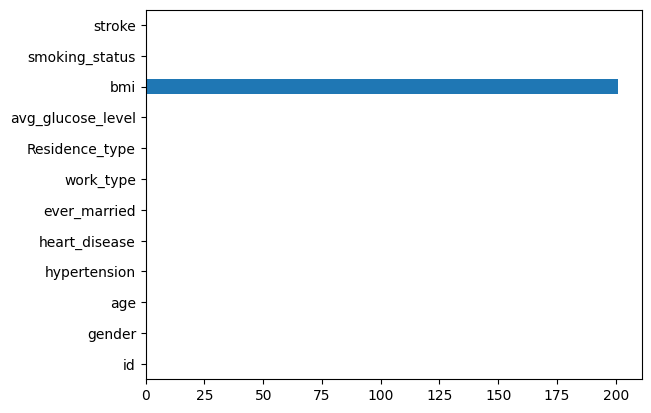

In [4]:
# Printing the number of N/A values in eacg column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

* Found 201 NULL values in bmi column

<Axes: >

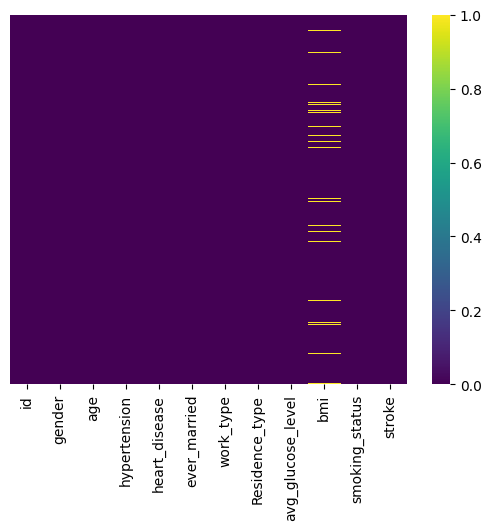

In [5]:
#PLOTTING THE HAET MAP FOR NULL VALUES
sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')

In [6]:
## To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


PRE PROCESSING THE DATA

In [ ]:
#dropping the column named "id" from the DataFrame "df"
df = df.drop(['id'],axis=1)

 Gender analysis

In [8]:
# Checking the values in the gender column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

* We have a 'other' gender and since there is only 1 instance we will remove it as to reduce the dimension of age


<Axes: ylabel='gender'>

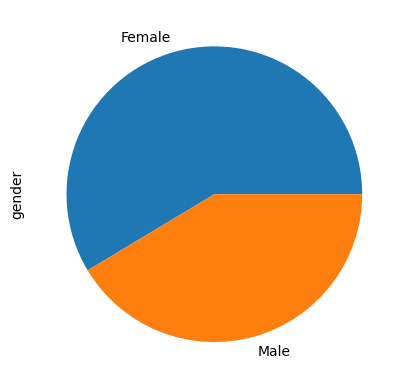

In [9]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

* There are more females as compared to males 

Target feature - Stroke

* Stroke analysis

In [10]:
# it will count the unique value in stroke
df['stroke'].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

<Axes: >

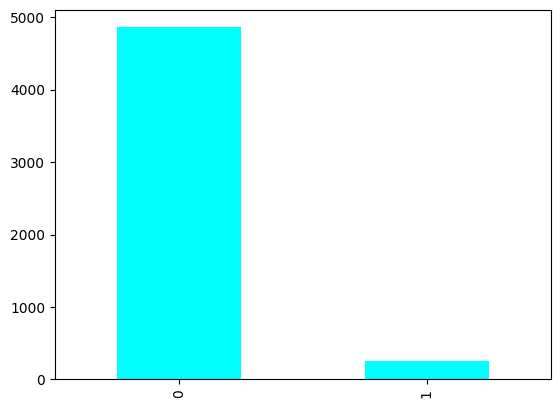

In [11]:
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [12]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


* Our dataset is highly skewed since only around 5% of the instances got stroke 
* We will be needing to perform necessary transformations to improve samples of minority class 

Hyper-tension Analysis

<Axes: >

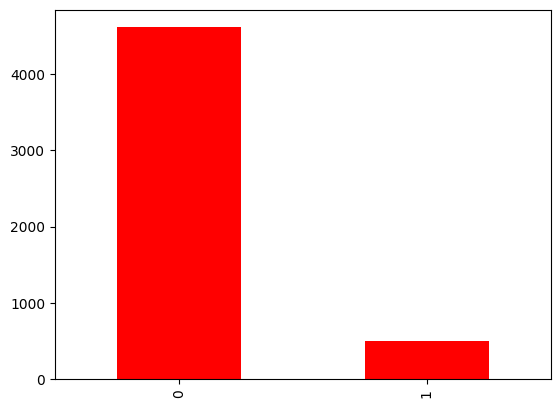

In [13]:
# Graphical representation of the value counts of the hypertension attribute
df['hypertension'].value_counts().plot(kind="bar",color = "red")

Work type Analysis

In [14]:
# Value of count of work-type attribute
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<Axes: ylabel='work_type'>

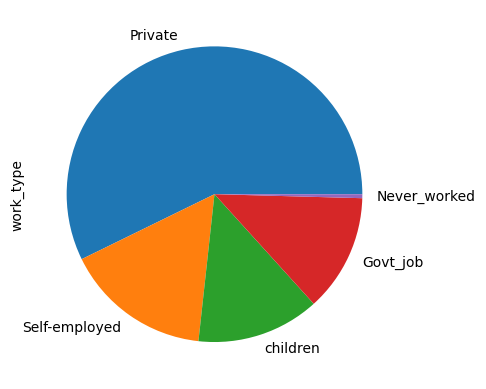

In [15]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

 Smoking status Analysis

In [16]:
# Value of count of smoking status attribute
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<Axes: ylabel='smoking_status'>

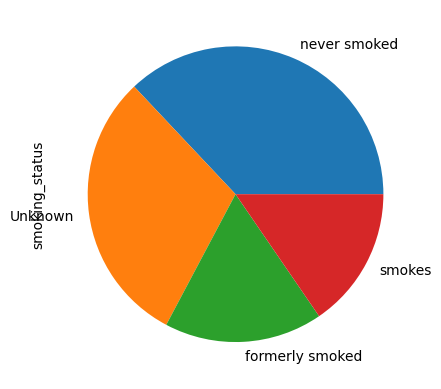

In [17]:
# Graphical representation of the value counts of the smoking staus attribute
df['smoking_status'].value_counts().plot(kind="pie")

Residence type Analysis

In [18]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<Axes: ylabel='Residence_type'>

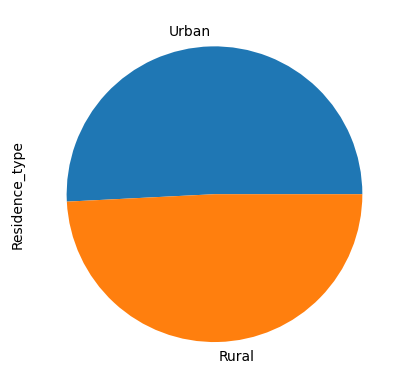

In [19]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

* We have an equal percentage of population who are from Urban and rural areas

BMI analysis

In [20]:
# Number of BMI - NULL values
df['bmi'].isnull().sum()

201

* We only have N/A values in bmi column - 201 Null values

<Axes: xlabel='bmi', ylabel='Count'>

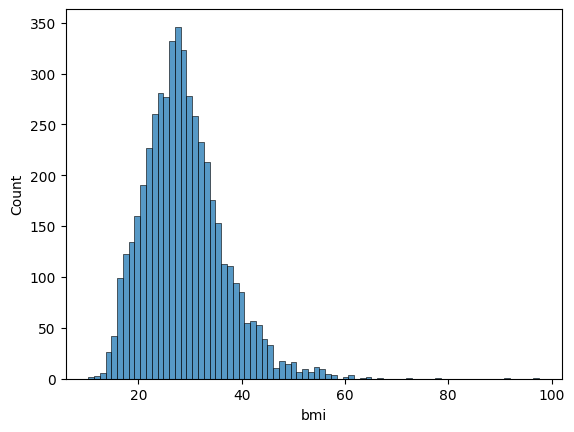

In [21]:
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

* Bmi is rightly skewed

<Axes: >

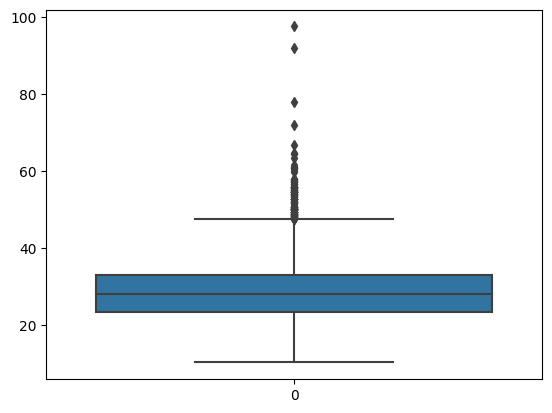

In [22]:
sns.boxplot(data=df['bmi'])

* Based on the histogram and boxplot we see that there are many outliers in bmi 

In [23]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    5000
True      110
Name: bmi, dtype: int64

* Total outliers in bmi:110
* Total non-outliers in bmi:5000

In [24]:
# Percentage of NULL values in bmi
df['bmi'].isna().sum()/len(df['bmi'])*100

3.9334637964774952

* NULL values hold 3.93 % of the instances in the dataframe

In [25]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [26]:
# Percentage of instances who got stroke
df['stroke'].sum()/len(df)*100

4.87279843444227

* Our main target function is stroke And the instances who got a stroke is in the minority - 249  Which is only 4.9 % of the instances

In [27]:
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


* Among the 201 bmi NULL values 40 values in them got stroke 
* Thus we cant drop NULL values 

* Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
* Hence we impute it with median values


In [28]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


<Axes: >

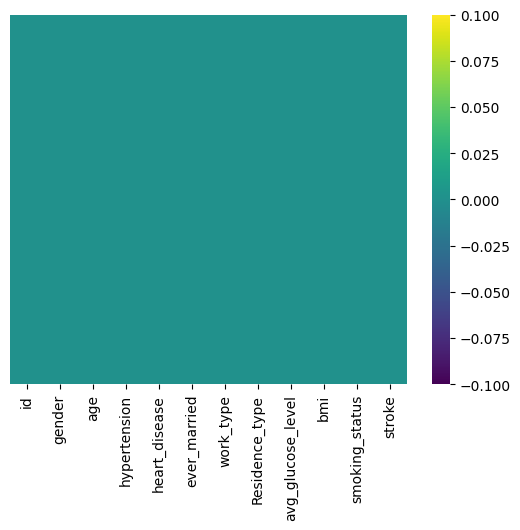

In [29]:
#PLOTTING THE HEAT MAP AFTER REMOVING NULLL VALUES
sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')

AGE analysis

<Axes: xlabel='age', ylabel='Count'>

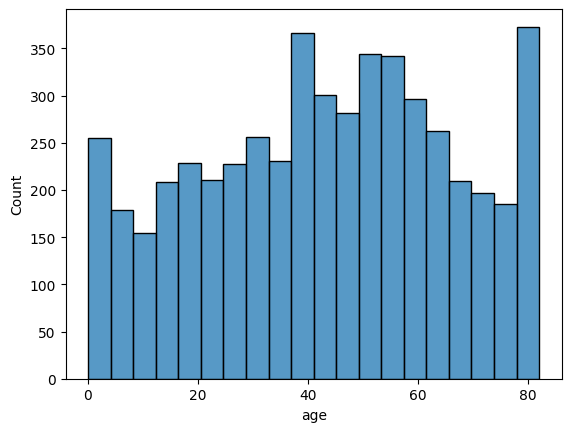

In [30]:
# Graphical representation fo the data in age column
# histogram
sns.histplot(data=df['age'])

<Axes: >

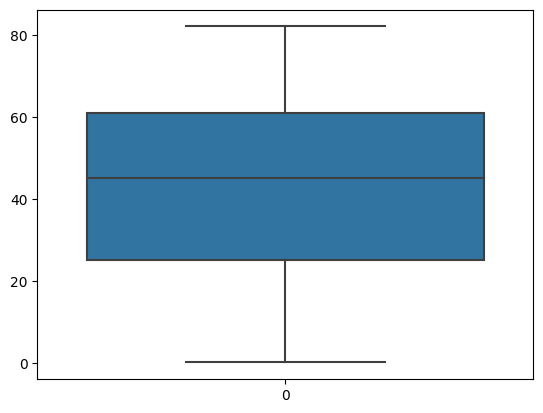

In [31]:
# boxplot
sns.boxplot(data=df['age'])

* The age parameter values does not have any outliers
* And has a normal distribution


AVERAGE GLUCOSE LEVEL ANALYSIS

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

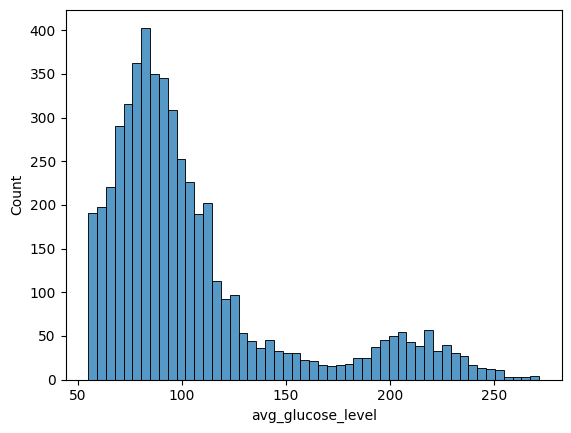

In [32]:
# Graphical representation fo the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])

<Axes: >

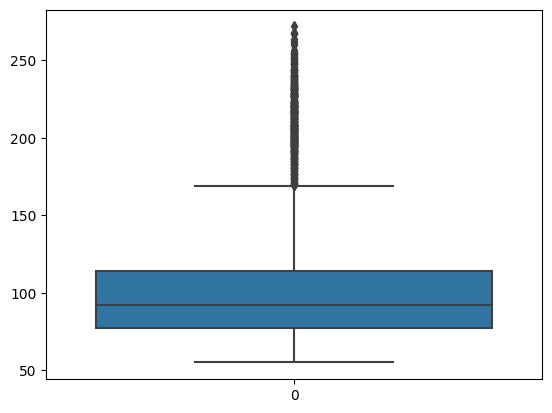

In [33]:
sns.boxplot(data=df['avg_glucose_level'])

* There are many outliers present based on the boxplot and histogram 
* The data is positively skewed 

In [34]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    4483
True      627
Name: avg_glucose_level, dtype: int64

* Total outliers in avg_glucose_level : 627
* Total non-outliers in avg_glucose_level : 4483

<Axes: >

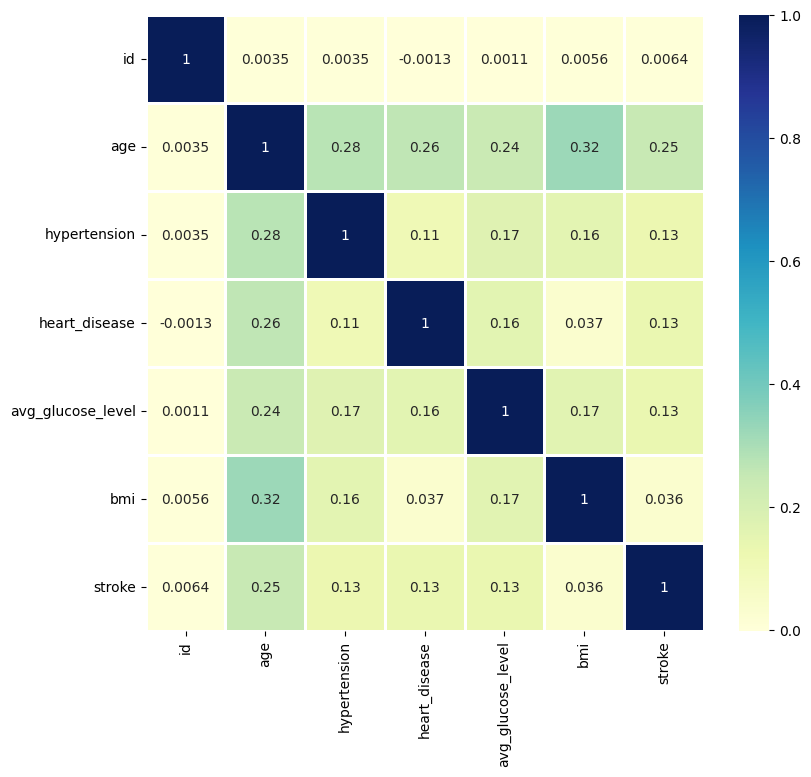

In [35]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

* There is  a weak correlation between the attributes as per the plotted heatmap
* The highest correlation found was between age and bmi - 0.32
* Rest all correlations were less than 0.32
* We could not drw any statistical insight from heatmap


 Heart_disease analysis 

In [36]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

* This data reflects that around 94.5 % of the total population or list of people are free from Heart_disease and only 6.5 % are having heart_disease.

<Axes: ylabel='heart_disease'>

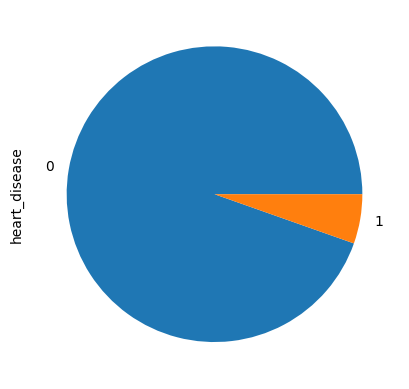

In [37]:

df['heart_disease'].value_counts().plot(kind="pie")

Ever_married analysis with Values

In [38]:
# Value count of evver married attribute
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

* This result shows that 65.6 % of people from the list are married and 34.4 % are unmarried.

<Axes: ylabel='ever_married'>

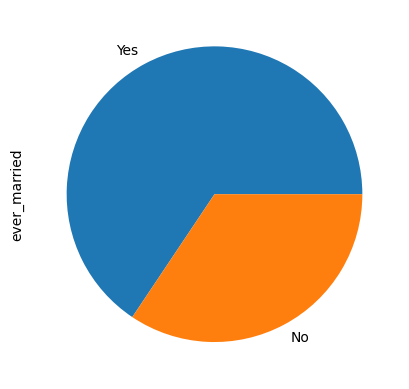

In [39]:
#GRAPHICAL REPRESENTATION
df['ever_married'].value_counts().plot(kind="pie")

<Axes: xlabel='stroke', ylabel='count'>

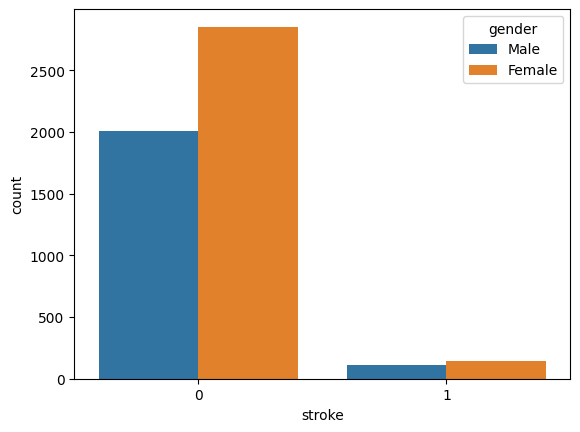

In [40]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

Cross analysis - all the attribute compared with target attibute

<Axes: xlabel='stroke', ylabel='count'>

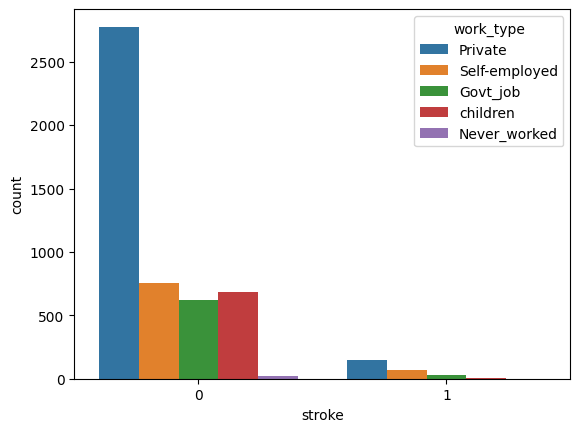

In [41]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='stroke', ylabel='count'>

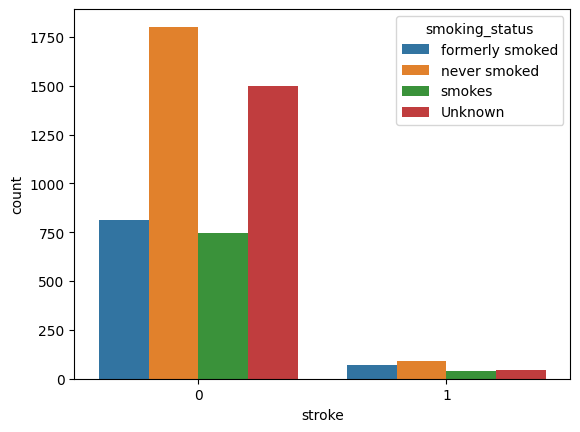

In [42]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

<Axes: xlabel='stroke', ylabel='count'>

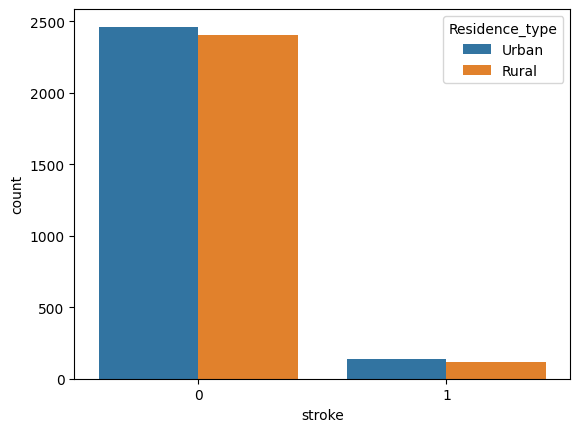

In [43]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

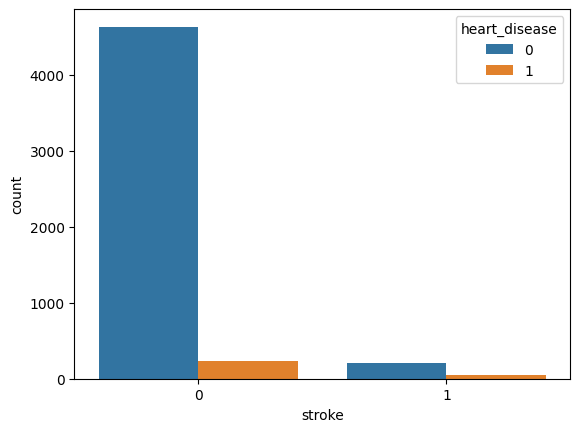

In [44]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

<Axes: xlabel='stroke', ylabel='count'>

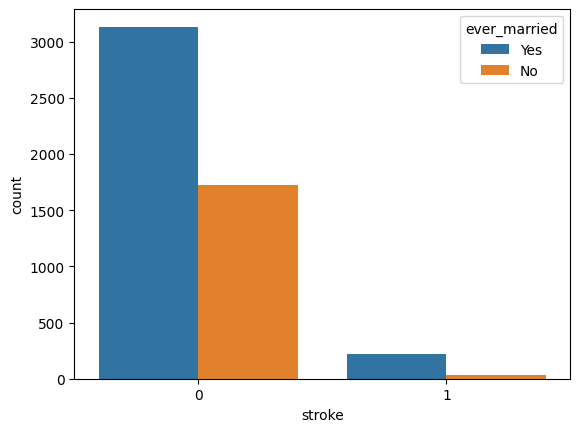

In [45]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

Creating dummy variables for numeric-binary attributes

In [46]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)

In [47]:
# The data frame after performing dummy attributes
df.head()

,id,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
1,51676,61.0,202.21,28.1,0,0,0,1,0,0,1,0,0,0,1,0,1
2,31112,80.0,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
3,60182,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
4,1665,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1


In [48]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library 
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [49]:
import pandas as pd
from scipy.stats import zscore

# Select the numerical columns
num_cols = df.select_dtypes(include='number').columns.tolist()

# Calculate the z-scores for the numerical columns
df[num_cols] = df[num_cols].apply(zscore)

# Set the threshold for the z-scores
threshold = 3

# Remove the rows containing outliers
df = df[(df[num_cols] < threshold).all(axis=1)]

 Creating test-train split (80-20 split)

In [50]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [51]:
# Checking the size of the splits 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 16)
y_train: (7777,)
X_test: (1945, 16)
y_test: (1945,)


 Training Model

Decision Tree

In [52]:
#importing the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics 
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train,y_train)

#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.974293059125964


In [53]:
#CLASSIFICATION REPORT OF DECISION TREE
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.95      0.97       975
           1       0.95      1.00      0.97       970

    accuracy                           0.97      1945
   macro avg       0.98      0.97      0.97      1945
weighted avg       0.98      0.97      0.97      1945



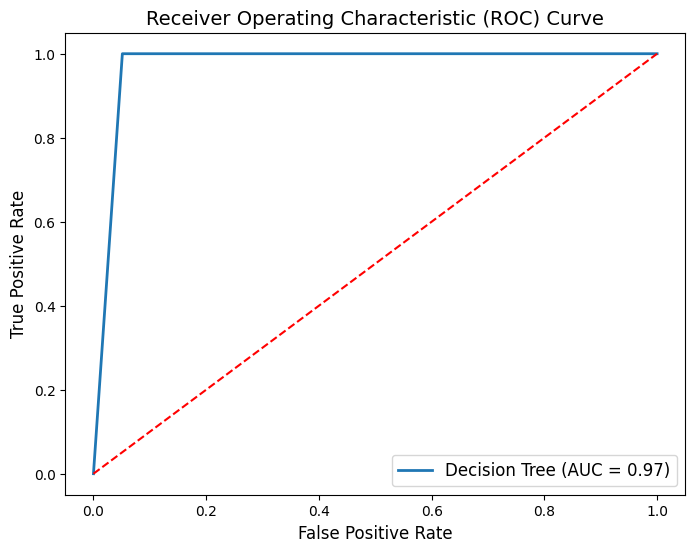

In [54]:
#PLOTTING THE ROC CURVE
# Calculate the probabilities of the positive class
y_pred_prob_dt = clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)

# Calculate the area under the ROC curve
auc_score = roc_auc_score(y_test, y_pred_prob_dt)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=f'Decision Tree (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()

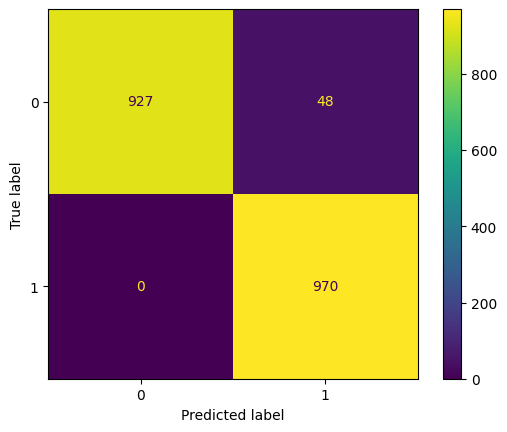

In [55]:
#CONFUSION MATRIX FOR DECISION TREE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train, y_train)

#predicting result using the test dataset
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [56]:
ac_dt = metrics.accuracy_score(y_test, y_pred)

In [57]:
ac_dt

0.9753213367609255

KNN

In [58]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.9784061696658097
ROC AUC Score: 0.9784615384615385


In [59]:
#CLASSIFICATION REPORT FOR KNN
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       975
           1       0.96      1.00      0.98       970

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945



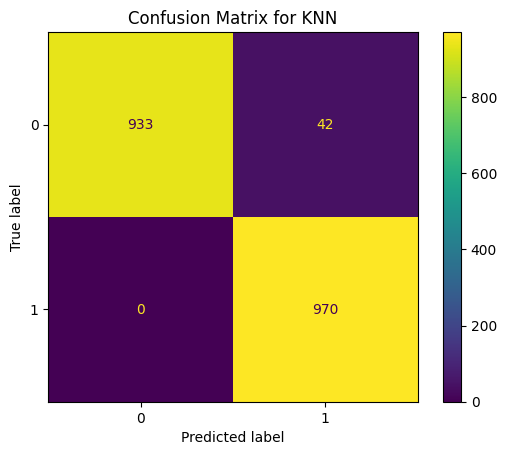

In [60]:
#CONFUSION MATRIX FOR KNN
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_knn)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd.plot()
plt.title("Confusion Matrix for KNN")
plt.show()

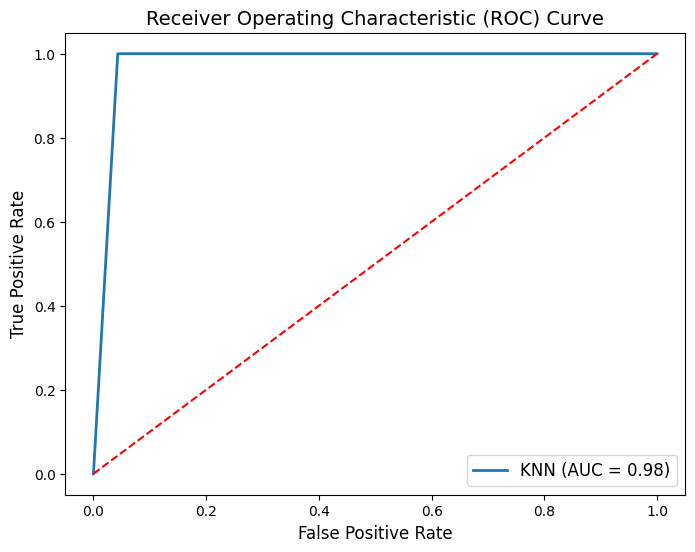

In [61]:
#PLOTTING THE ROC CURVE 
# Calculate the probabilities of the positive class
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

# Calculate the area under the ROC curve
auc_score = roc_auc_score(y_test, y_pred_prob_knn)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=f'KNN (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [62]:
ac_knn=accuracy_score(y_test, y_pred_knn)

In [63]:
ac_knn

0.9784061696658097

XGBOOST

Accuracy: 0.9784061696658097
ROC AUC Score: 0.9990039651070579


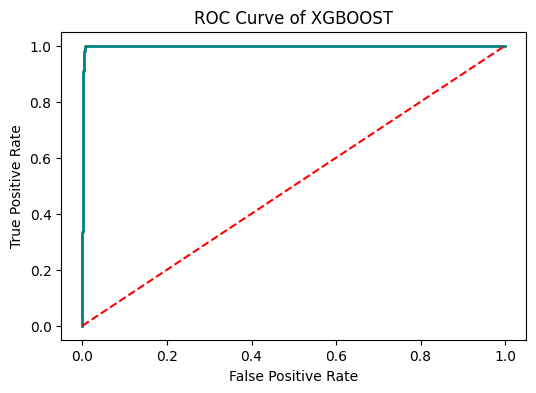

In [64]:
#importing the XGBoost Classifier module and plotting roc curve
from xgboost  import XGBClassifier

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# plots of roc_auc 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [65]:
ac_xgboost = accuracy_score(y_test, y_pred_xgb)

In [66]:
ac_xgboost

0.9784061696658097

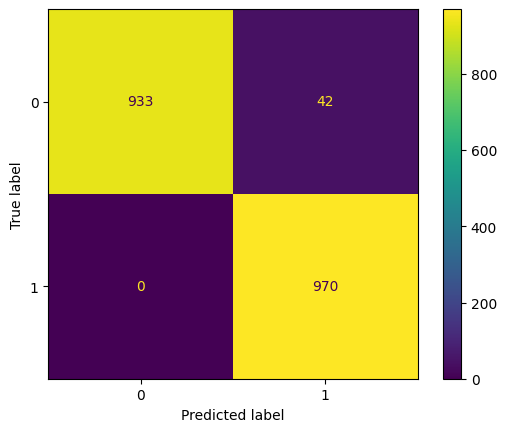

In [67]:
# Plotting the confusion matrix for xgboost
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb,X_test,y_test)

In [68]:
#CLASSIFICATION REPORT FOR XGBOOST
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       975
           1       0.96      1.00      0.98       970

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945



RANDOM FOREST

In [69]:
# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))



Accuracy: 0.9969151670951156


In [70]:
#CLASSIFICATION REPORT FOR RANDOM FOREST
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       975
           1       0.99      1.00      1.00       970

    accuracy                           1.00      1945
   macro avg       1.00      1.00      1.00      1945
weighted avg       1.00      1.00      1.00      1945



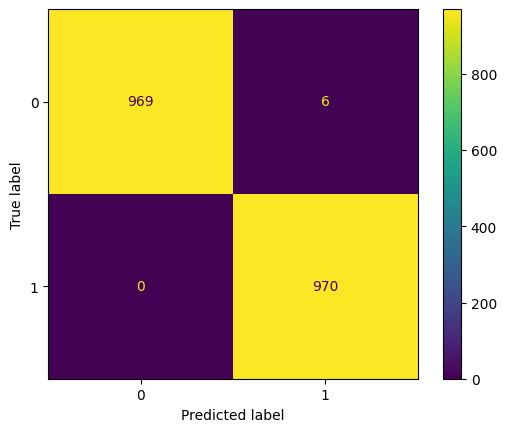

In [71]:
#CONFUSION MATRIX FOR RANDOM FOREST

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()






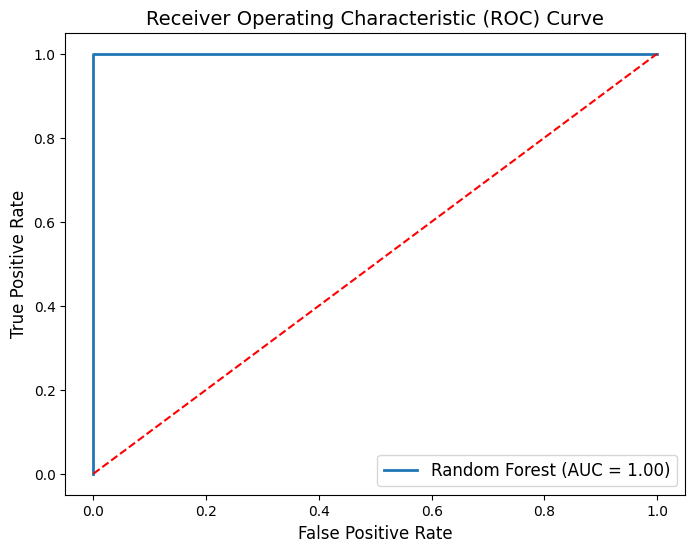

In [72]:
# import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predict probabilities for the test dataset
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
auc_score = roc_auc_score(y_test, y_pred_prob_rf)

# plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [73]:
ac_rf=accuracy_score(y_test, y_pred_rf)

In [74]:
ac_rf

0.9969151670951156

LOGISTIC REGRESSION

In [75]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

Accuracy: 0.7239074550128535


In [76]:
#CLASSIFICATION REPORT OF LOGISTIC
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       975
           1       0.99      1.00      1.00       970

    accuracy                           1.00      1945
   macro avg       1.00      1.00      1.00      1945
weighted avg       1.00      1.00      1.00      1945



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


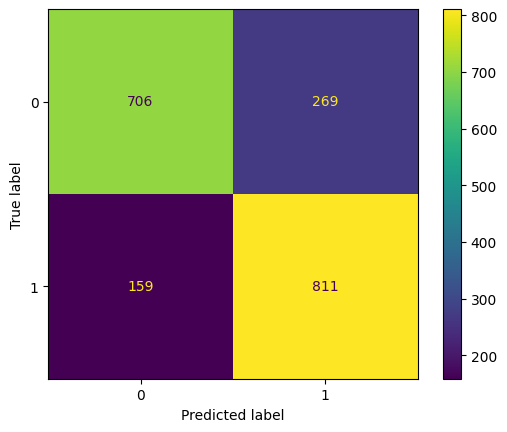

In [ ]:
#CONFUSION MATRIX FOR LOGISTIC 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred_lr = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


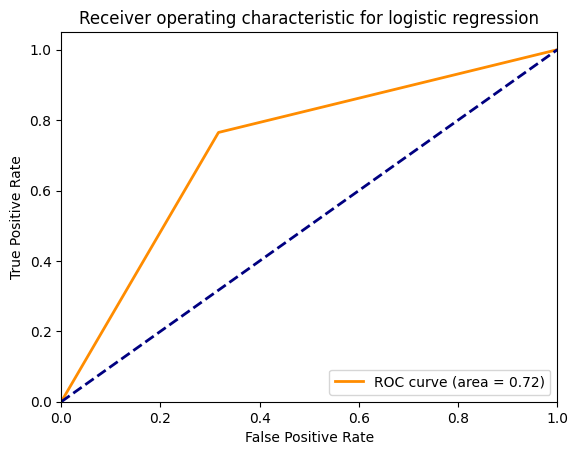

In [77]:
from sklearn.metrics import roc_curve, auc

# Train the logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = classifier.predict(X_test)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc="lower right")
plt.show()


In [78]:
ac_1r = accuracy_score(y_test, y_pred_lr)

In [79]:
ac_1r

0.7239074550128535

<function matplotlib.pyplot.show(close=None, block=None)>

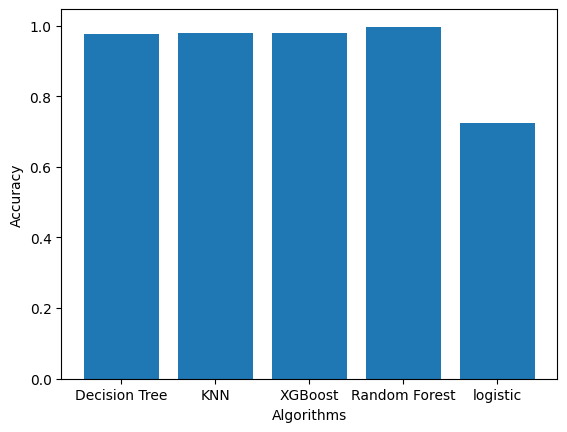

In [80]:
#graph accuracy
plt.bar(['Decision Tree','KNN', 'XGBoost', 'Random Forest','logistic'],[ac_dt,ac_xgboost,ac_knn,ac_rf,ac_1r])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show

**TESTING**

In [84]:
import pandas as pd
Data = pd.read_csv("/content/2testhealthcare-dataset-stroke-data test.csv")

In [85]:
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [86]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1023 non-null   int64  
 1   gender             1023 non-null   object 
 2   age                1023 non-null   float64
 3   hypertension       1023 non-null   int64  
 4   heart_disease      1023 non-null   int64  
 5   ever_married       1023 non-null   object 
 6   work_type          1023 non-null   object 
 7   Residence_type     1023 non-null   object 
 8   avg_glucose_level  1023 non-null   float64
 9   bmi                963 non-null    float64
 10  smoking_status     1023 non-null   object 
 11  stroke             1023 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 96.0+ KB


In [87]:
Data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,963.000000,1023.000000
mean,35791.105572,44.746276,0.117302,0.066471,109.166207,28.980789,0.099707
std,20867.793866,22.803867,0.321937,0.249226,48.806266,7.673518,0.299755
min,132.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,17078.500000,27.000000,0.000000,0.000000,78.050000,23.600000,0.000000
50%,36226.000000,47.000000,0.000000,0.000000,92.620000,28.300000,0.000000
75%,52759.500000,62.000000,0.000000,0.000000,117.540000,33.100000,0.000000
max,72861.000000,82.000000,1.000000,1.000000,267.760000,66.800000,1.000000


In [88]:
Data = pd.read_csv("/content/2testhealthcare-dataset-stroke-data test.csv")

# replace missing values with NaN
Data.replace(" ", np.nan, inplace=True)

# fill missing values in numerical columns with mean
Data.fillna(Data.select_dtypes(include=np.number).mean(), inplace=True)

# fill missing values in categorical columns with mode
Data.fillna(Data.select_dtypes(include=object).mode().iloc[0], inplace=True)

# save the cleaned dataset to a new file
Data.to_csv("cleaned_dataset.csv", index=False)


decision tree

In [89]:

# Load the dataset
data = pd.read_csv('/content/cleaned_dataset.csv')
Data = Data.drop(['id'],axis=1)

# Preprocessing the data
# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Split the data into features and target
X = data.drop(['stroke'], axis=1)
y = data['stroke']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Number of predictions:', len(y_pred))


Accuracy: 0.9748071979434447
Number of predictions: 1945


KNN

In [90]:
                                                                                                                                                                         # Import the necessary libraries
# Load the dataset
Data = pd.read_csv('/content/cleaned_dataset.csv')

# Preprocessing the data
# Convert categorical variables to numerical
Data = pd.get_dummies(Data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Split the data into features and target
X = Data.drop(['stroke'], axis=1)
y = Data['stroke']

# Create a k-NN classifknn
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the target values for the testing data
y_predi = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_predi)

print('Accuracy:', accuracy)
print('Number of predictions:', len(y_predi))

Accuracy: 0.9311053984575836
Number of predictions: 1945


XGBOOST

In [91]:

# Import the necessary libraries
import xgboost as xgb


# Load the dataset
df = pd.read_csv('/content/cleaned_dataset.csv')

# Preprocessing the data
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Split the data into features and target
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Create an XGBoost classifier
clf = xgb.XGBClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target values for the testing data
y_predic = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_predic)

print('Accuracy:', accuracy)
print('Number of predictions:', len(y_predic))

Accuracy: 0.9784061696658097
Number of predictions: 1945


logistic

In [92]:

# Load the dataset
Data = pd.read_csv('/content/cleaned_dataset.csv')

# Preprocessing the data
# Convert categorical variables to numerical
Data = pd.get_dummies(Data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Split the data into features and target
X = Data.drop(['stroke'], axis=1)
y = Data['stroke']

# Create a logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the target values for the testing data
y_predicts = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_predicts)

print('Accuracy:', accuracy)
print('Number of predictions:', len(y_predicts))


Accuracy: 0.7239074550128535
Number of predictions: 1945


RANDOM FOREST CLASSIFIER

In [93]:

# Load the dataset
Data = pd.read_csv('/content/cleaned_dataset.csv')

# Preprocessing the data
# Convert categorical variables to numerical
Data = pd.get_dummies(Data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Split the data into features and target
X = Data.drop(['stroke'], axis=1)
y = Data['stroke']

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict the target values for the testing data
y_preds = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_preds)

print('Accuracy:', accuracy)
print('Number of predictions:', len(y_preds))


Accuracy: 0.9958868894601542
Number of predictions: 1945


In [94]:
print(sum(1 for i,j,k,l,m in zip(y_pred, y_predi, y_predic, y_predicts, y_preds) if i==j==k==l==m))

1329


In [95]:
unique,counts=np.unique(y_pred,return_counts=True)
dict(zip(unique,counts))

{0: 926, 1: 1019}

In [96]:
unique,counts=np.unique(y_predi,return_counts=True)
dict(zip(unique,counts))

{0: 841, 1: 1104}

In [97]:
unique,counts=np.unique(y_predic,return_counts=True)
dict(zip(unique,counts))

{0: 933, 1: 1012}

In [98]:
unique,counts=np.unique(y_predicts,return_counts=True)
dict(zip(unique,counts))

{0: 894, 1: 1051}

In [99]:
unique,counts=np.unique(y_preds,return_counts=True)
dict(zip(unique,counts))

{0: 967, 1: 978}